<h3>the tools module consists of functions which help in portfolio analysis and optimizations. it consists of methods which can perform functions like calculating the sharpe ratio,sortino ratio and plotting the efficient portfolio. so we start by importing the tools module and doing some exploratory data analysis on the returns of the stocks considered for the portfolio



In [23]:
import tools as t



tickers = ['RELIANCE.NS', 'LT.NS', 'ADANIPORTS.NS', 'BRITANNIA.NS','ITC.NS','ONGC.NS','KOTAKBANK.NS','SUNPHARMA.NS',"HDFC.NS",'M&M.NS',"ULTRACEMCO.NS","UPL.NS"] # tickers of the stocks in our portfolio
prices=t.get_data(tickers,2)

prices.head(8)    # prices consists of the adjusted closed price of the given tickers



Symbols,RELIANCE.NS,LT.NS,ADANIPORTS.NS,BRITANNIA.NS,ITC.NS,ONGC.NS,KOTAKBANK.NS,SUNPHARMA.NS,HDFC.NS,M&M.NS,ULTRACEMCO.NS,UPL.NS
Date,,,,,,,,,,,,
2020-10-31,1917.837891,1074.992920,405.875092,3450.961426,175.767975,70.825790,1905.006592,500.280029,2207.495850,706.732605,4751.405273,406.997742
2020-11-30,1972.993896,1257.090576,477.079529,3392.527832,189.700531,83.953377,1993.409424,579.186707,2503.361084,705.362183,5232.432617,454.401215
2020-12-31,1830.532349,1303.074463,502.671722,3321.145752,184.481491,79.667740,1711.069702,573.173340,2326.419189,733.748962,5271.121094,546.285095
2021-01-31,2072.870850,1408.320190,666.580017,3190.854980,185.026123,100.148575,1778.395752,581.386658,2484.527100,789.347900,6050.571289,547.161987
2021-02-28,1990.683350,1385.279419,692.714600,3438.724365,203.024002,93.744995,1751.075684,589.625427,2444.119873,778.433655,6666.958008,625.404541
2021-03-31,1982.136841,1308.688232,719.983276,3271.723389,188.250183,99.251305,1746.880493,645.500732,2367.805176,736.636597,6212.794434,591.350037
2021-04-30,2146.908936,1432.923096,758.938599,3324.756836,201.258591,104.298767,1805.715698,659.161377,2497.686768,790.865112,6637.323242,794.215576
2021-05-31,2097.566650,1464.994751,693.996643,3532.419189,188.343079,108.015526,1703.977539,666.213562,2443.881348,761.254822,6704.606445,772.535583


<h2> Exploratory Data Analysis


<h4> now that we got the monthly prices of the stocks in our portfolio by using the get data method from the tools module we start doing the analysis

In [24]:
prices.shape

# the prices dataframe consists of 25months of prices of stocks

(25, 12)

<h2> from the monthly data we calculate the monthly returns of these 5 stocks and visualize the returns

(<AxesSubplot:xlabel='Date'>,
 Symbols     RELIANCE.NS     LT.NS  ADANIPORTS.NS  BRITANNIA.NS    ITC.NS  \
 Date                                                                       
 2020-10-31          NaN       NaN            NaN           NaN       NaN   
 2020-11-30     0.028759  0.169394       0.175434     -0.016933  0.079267   
 2020-12-31    -0.072206  0.036580       0.053643     -0.021041 -0.027512   
 2021-01-31     0.132387  0.080767       0.326074     -0.039231  0.002952   
 2021-02-28    -0.039649 -0.016360       0.039207      0.077681  0.097272   
 2021-03-31    -0.004293 -0.055289       0.039365     -0.048565 -0.072769   
 2021-04-30     0.083129  0.094931       0.054106      0.016210  0.069102   
 2021-05-31    -0.022983  0.022382      -0.085569      0.062459 -0.064174   
 
 Symbols      ONGC.NS  KOTAKBANK.NS  SUNPHARMA.NS   HDFC.NS    M&M.NS  \
 Date                                                                   
 2020-10-31       NaN           NaN           NaN   

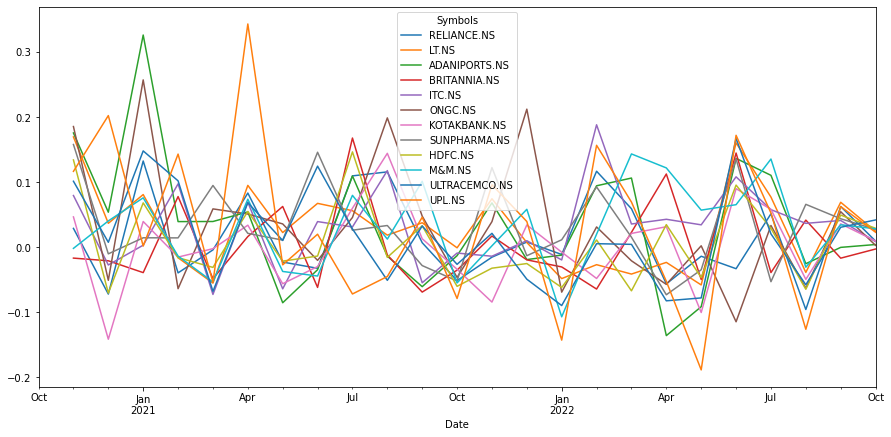

In [25]:
returns=t.returns(prices,size=(15,7))
returns

In [26]:
returns[1].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2020-10-31 to 2021-05-31
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RELIANCE.NS    7 non-null      float64
 1   LT.NS          7 non-null      float64
 2   ADANIPORTS.NS  7 non-null      float64
 3   BRITANNIA.NS   7 non-null      float64
 4   ITC.NS         7 non-null      float64
 5   ONGC.NS        7 non-null      float64
 6   KOTAKBANK.NS   7 non-null      float64
 7   SUNPHARMA.NS   7 non-null      float64
 8   HDFC.NS        7 non-null      float64
 9   M&M.NS         7 non-null      float64
 10  ULTRACEMCO.NS  7 non-null      float64
 11  UPL.NS         7 non-null      float64
dtypes: float64(12)
memory usage: 832.0 bytes


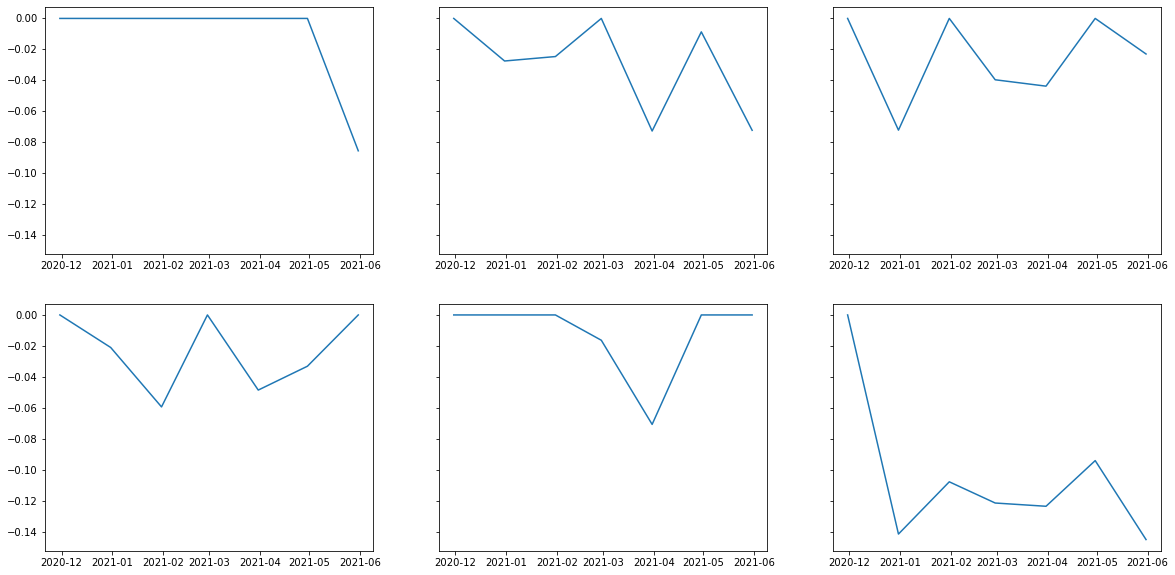

In [27]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(20,10),sharey=True)
ax[0,0].plot((t.maxdrawdown(returns[1]["ADANIPORTS.NS"]))["Drawdown"])
ax[0,1].plot((t.maxdrawdown(returns[1]["ITC.NS"]))["Drawdown"])
ax[0,2].plot((t.maxdrawdown(returns[1]["RELIANCE.NS"]))["Drawdown"])
ax[1,0].plot((t.maxdrawdown(returns[1]["BRITANNIA.NS"]))["Drawdown"])
ax[1,1].plot((t.maxdrawdown(returns[1]["LT.NS"]))["Drawdown"])
ax[1,2].plot((t.maxdrawdown(returns[1]["KOTAKBANK.NS"]))["Drawdown"])



In [28]:
v=t.maxdrawdown(returns[1]["ADANIPORTS.NS"])
v["Drawdown"]

Date
2020-10-31         NaN
2020-11-30    0.000000
2020-12-31    0.000000
2021-01-31    0.000000
2021-02-28    0.000000
2021-03-31    0.000000
2021-04-30    0.000000
2021-05-31   -0.085569
Name: Drawdown, dtype: float64

In [29]:
returns[1]["ADANIPORTS.NS"]

Date
2020-10-31         NaN
2020-11-30    0.175434
2020-12-31    0.053643
2021-01-31    0.326074
2021-02-28    0.039207
2021-03-31    0.039365
2021-04-30    0.054106
2021-05-31   -0.085569
Name: ADANIPORTS.NS, dtype: float64

In [30]:
returns[1].corr()

Symbols,RELIANCE.NS,LT.NS,ADANIPORTS.NS,BRITANNIA.NS,ITC.NS,ONGC.NS,KOTAKBANK.NS,SUNPHARMA.NS,HDFC.NS,M&M.NS,ULTRACEMCO.NS,UPL.NS
Symbols,,,,,,,,,,,,
RELIANCE.NS,1.000000,0.501543,0.713520,-0.355095,0.232924,0.823064,0.792578,0.122275,0.718249,0.604548,0.570259,0.029132
LT.NS,0.501543,1.000000,0.510567,-0.175858,0.513477,0.593788,0.423379,0.365557,0.838226,0.542056,0.624966,0.398984
ADANIPORTS.NS,0.713520,0.510567,1.000000,-0.591885,0.297544,0.791553,0.527455,0.218177,0.626282,0.588873,0.675033,-0.055677
BRITANNIA.NS,-0.355095,-0.175858,-0.591885,1.000000,0.333038,-0.545196,-0.149588,-0.380854,-0.197233,-0.243085,0.168353,0.193135
ITC.NS,0.232924,0.513477,0.297544,0.333038,1.000000,0.038538,0.475939,0.174785,0.573999,0.364788,0.732417,0.638137
ONGC.NS,0.823064,0.593788,0.791553,-0.545196,0.038538,1.000000,0.699160,0.450628,0.784319,0.316970,0.479069,-0.330997
KOTAKBANK.NS,0.792578,0.423379,0.527455,-0.149588,0.475939,0.699160,1.000000,0.542587,0.835430,0.155496,0.501811,-0.038060
SUNPHARMA.NS,0.122275,0.365557,0.218177,-0.380854,0.174785,0.450628,0.542587,1.000000,0.602951,-0.388998,-0.051729,-0.217115
HDFC.NS,0.718249,0.838226,0.626282,-0.197233,0.573999,0.784319,0.835430,0.602951,1.000000,0.333302,0.666117,0.133256


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

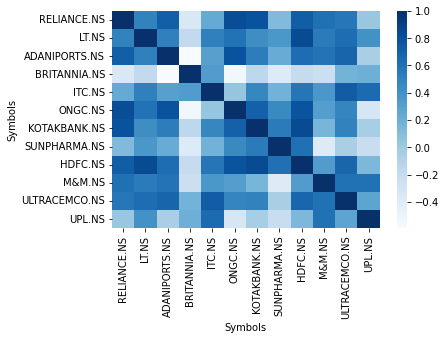

In [31]:
import seaborn as sns
sns.heatmap(data=returns[1].corr(),cmap='Blues')


<AxesSubplot:xlabel='Symbols'>

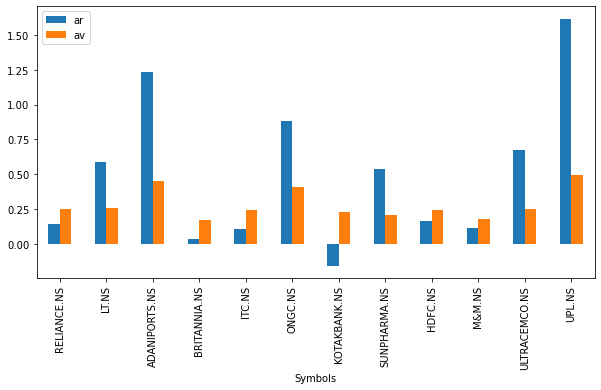

In [32]:
import pandas as pd
ar=t.annualized_returns(returns[1],12)
av=t.annualized_volatility(returns[1],12)
arv=pd.DataFrame({"ar":ar,"av":av})
arv.plot.bar(figsize=(10,5))

<AxesSubplot:xlabel='Symbols'>

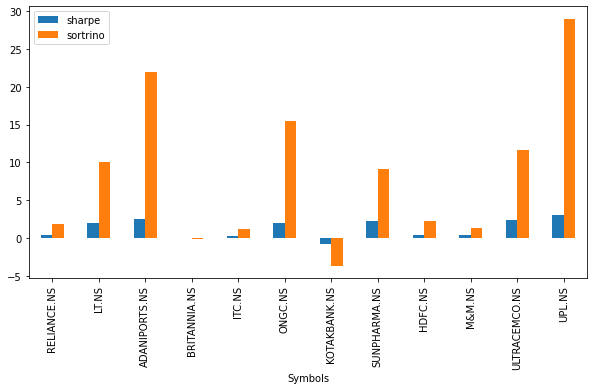

In [33]:
sharpe=t.sharpe_ratio(returns[1],0.05,12)
sortino=t.sortino_ratio(returns[1],0.05,12)
ss=pd.DataFrame({"sharpe":sharpe,"sortrino":sortino})
ss.plot.bar(figsize=(10,5))

<H1>PORTFOLIO CONSTRUCTION

In [41]:
weights_to_acheive_returns=t.minimize_vol(0.65,ar,returns[1].cov(),"m")
weights_to_acheive_returns

array([0.00000000e+00, 0.00000000e+00, 1.33844640e-01, 3.42347431e-01,
       0.00000000e+00, 5.77974509e-02, 9.47131932e-17, 3.07245180e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.58765297e-01])

In [42]:
my_portfolio_returns=t.portfolio_returns(ar,weights_to_acheive_returns)
my_portfolio_returns

0.6499999999976187

In [43]:
my_portfolio_vol=t.portfolio_volatility(weights_to_acheive_returns,returns[1].cov(),"m")
my_portfolio_vol

0.11159422996574712

In [44]:
my_portfolio_sharpe=t.portfolio_sharpe(my_portfolio_returns,my_portfolio_vol,0.03)
my_portfolio_sharpe


5.555842808252024

In [45]:
semi_d=t.semi_deviation(returns[1],portfolio=True)
downside_risk=t.portfolio_volatility(weights_to_acheive_returns,semi_d,)
my_portfolio_sortino=t.portfolio_sortino(my_portfolio_returns,downside_risk,0.03)
my_portfolio_sortino

20.262341512490565

In [46]:
maximim_sharpe_portfolio=t.msr(ar,returns[1].cov(),"m",0.03)
maximim_sharpe_portfolio

(array([0.00000000e+00, 5.49889913e-14, 1.33587838e-01, 3.40967051e-01,
        1.86512007e-13, 5.78981875e-02, 1.12683270e-13, 3.07921484e-01,
        1.38190199e-13, 0.00000000e+00, 0.00000000e+00, 1.59625439e-01]),
 0.651474675539093,
 0.11185910232973331)

<AxesSubplot:xlabel='risk'>

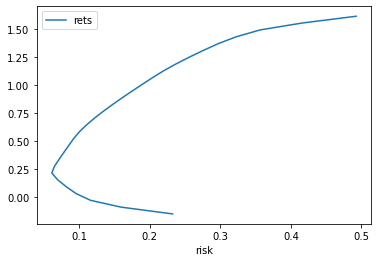

In [47]:
t.plot_optimal_portfolio(ar,returns[1].cov(),"m",30)